In [2]:
from pathlib import Path
import pandas as pd
import numpy as np
import scipy.stats as ss
from fractions import Fraction
from empiricaldist import Pmf
import matplotlib.pyplot as plt

In [6]:
n = 2
p = 0.5
k = 0
ss.binom.pmf(k, n, p)

0.25

In [9]:
ks = np.arange(n + 1)
ps = ss.binom.pmf(ks, n, p)
ps

array([0.25, 0.5 , 0.25])

In [10]:
pmf_k = Pmf(ps, ks)
pmf_k

,probs
0,0.25
1,0.50
2,0.25


In [11]:
def make_binomial(n, p):
    ks = np.arange(n + 1)
    ps = ss.binom.pmf(ks, n, p)
    return Pmf(ps, ks)

In [13]:
pmf_k = make_binomial(250, 0.5)

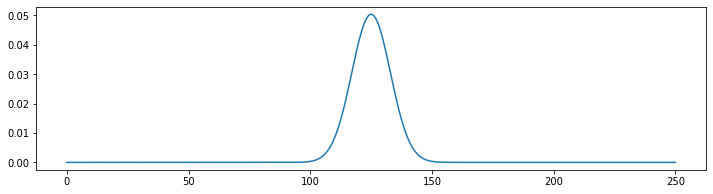

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(12, 3))
ax.plot(pmf_k, label='binomial')
plt.show()

In [16]:
pmf_k.idxmax(), pmf_k.max_prob()

(125, 125)

In [19]:
def prob_ge(pmf, threshold):
    ge = pmf.qs >= threshold
    total = pmf[ge].sum()
    return total

In [20]:
prob_ge(pmf_k, 140)

0.03321057562002164

In [23]:
pmf_k.prob_ge(140), pmf_k.prob_le(110)

(0.03321057562002164, 0.03321057562002164)

In [25]:
hypos = np.linspace(0, 1, 101)

In [26]:
prior = Pmf(1, hypos)
prior.normalize()
prior.head()

,probs
0.00,0.009901
0.01,0.009901
0.02,0.009901


In [27]:
likelihood_heads = hypos
likelihood_tails = 1 - hypos
likelihood_heads, likelihood_tails

(array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
        0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
        0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
        0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
        0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
        0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
        0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
        0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
        0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
        0.99, 1.  ]),
 array([1.  , 0.99, 0.98, 0.97, 0.96, 0.95, 0.94, 0.93, 0.92, 0.91, 0.9 ,
        0.89, 0.88, 0.87, 0.86, 0.85, 0.84, 0.83, 0.82, 0.81, 0.8 , 0.79,
        0.78, 0.77, 0.76, 0.75, 0.74, 0.73, 0.72, 0.71, 0.7 , 0.69, 0.68,
        0.67, 0.66, 0.65, 0.64, 0.63, 0.62, 0.61, 0.6 , 0.59, 0.58, 0.57,
        0.56, 0.

In [28]:
likelihood = {'H':likelihood_heads, 'T':likelihood_tails}

In [29]:
dataset = 'H' * 140 + 'T' * 110

In [30]:
def update_euro(pmf, dataset):
    for data in dataset:
        pmf *= likelihood[data]
    
    pmf.normalize()

In [31]:
posterior = prior.copy()
update_euro(posterior, dataset)

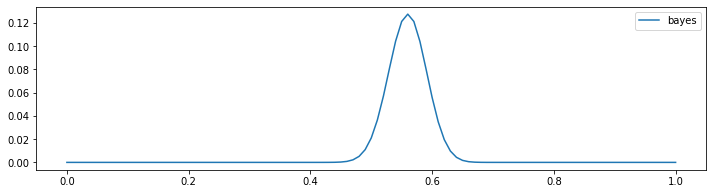

In [35]:
fig, ax = plt.subplots(1, 1, figsize=(12, 3))
ax.plot(posterior, label='bayes')
plt.legend()
plt.show()

In [36]:
posterior.idxmax()

0.56

In [37]:
uniform = Pmf(1, hypos, name='uniform')
uniform.normalize()
uniform.head()

,probs
0.00,0.009901
0.01,0.009901
0.02,0.009901


In [41]:
ramp_up = np.arange(50)
ramp_down = np.arange(50, -1, -1)
ramp = np.append(ramp_up, ramp_down)
ramp

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       49, 48, 47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34, 33,
       32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16,
       15, 14, 13, 12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1,  0])

In [44]:
triangle = Pmf(ramp, hypos, name='triangle')
triangle.normalize()
triangle.head()

,probs
0.00,0.0000
0.01,0.0004
0.02,0.0008


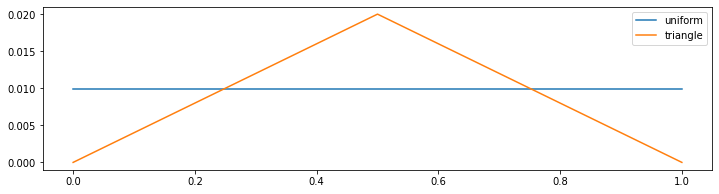

In [45]:
fig, ax = plt.subplots(1, 1, figsize=(12, 3))
ax.plot(uniform, label='uniform')
ax.plot(triangle, label='triangle')
plt.legend()
plt.show()

In [46]:
update_euro(uniform, dataset)

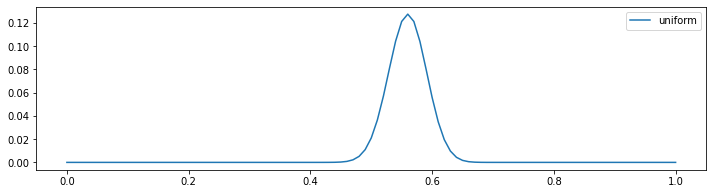

In [47]:
fig, ax = plt.subplots(1, 1, figsize=(12, 3))
ax.plot(uniform, label='uniform')
plt.legend()
plt.show()

In [48]:
update_euro(triangle, dataset)

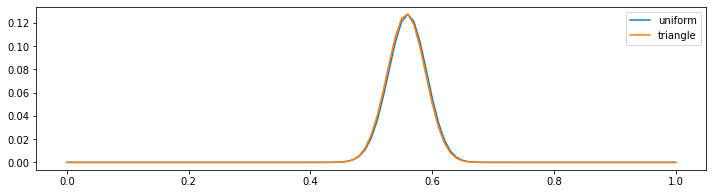

In [49]:
fig, ax = plt.subplots(1, 1, figsize=(12, 3))
ax.plot(uniform, label='uniform')
ax.plot(triangle, label='triangle')
plt.legend()
plt.show()

In [50]:
def update_binomial(pmf, data):
    k, n = data
    xs = pmf.qs
    likelihood = ss.binom.pmf(k, n, xs)
    pmf *= likelihood
    pmf.normalize()

In [51]:
uniform2 = Pmf(1, hypos, name='uniform2')
data = 140, 250

In [52]:
update_binomial(uniform2, data)

In [53]:
np.allclose(uniform, uniform2)

True